Part1. 탐색적 데이터 분석(EDA)
1) 특징 분석
2) 다양한 기능을 고려한 관계나 트렌드 찾기

Part2. 기능 엔지니어링 및 데이터 정리
1) 몇 가지 기능 추가
2) 중복 기능 제거
3) 특징을 모델링에 적합한 형태로 변환

Part3. 예측 모델링
1) 기본 알고리즘 실행
2) 교차 검증
3) 조립하기
4) 중요한 특징 추출

# Part1 : 탐색적 데이터 분석(EDA)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
data = pd.read_csv('Dietanic dataset/train.csv')

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

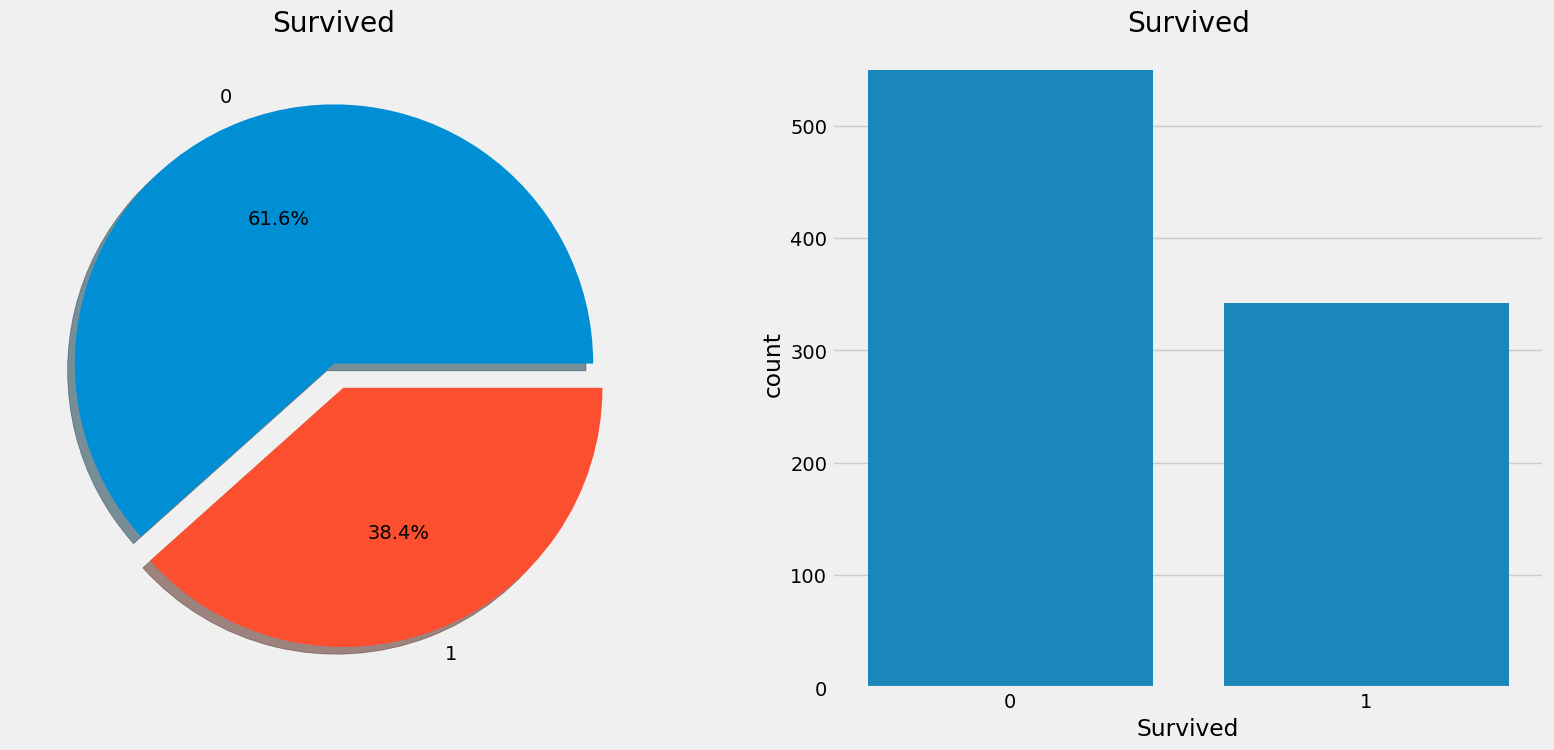

In [16]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

사고에서 살아남은 승객은 많지 않음이 분명함.

훈련 세트에 탑승한 891명의 승객 중 약 350만 명만이 사고에서 살아남음. 즉, 전체 훈련 세트의 38.4% 만이 사고에서 살아남음. 데이터에서 더 나은 인사이트를 얻고 어떤 카테고리의 승객이 살아남았는지, 누가 살아남지 못했는지 더 자세히 알아봐야 함.

데이터셋의 다양한 기능을 사용해 생존율을 확인해보자. 성별, 엠바케이션 항구, 나이 등의 기능이 있음.

먼저 다양한 유형의 기능을 이해해보자.

기능 유형
- 범주형 변수 : Sex, Embarked
- 순서형 변수 : Pclass
- 연속형 변수 : Age

In [26]:
# Categorical Feature - Sex

data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

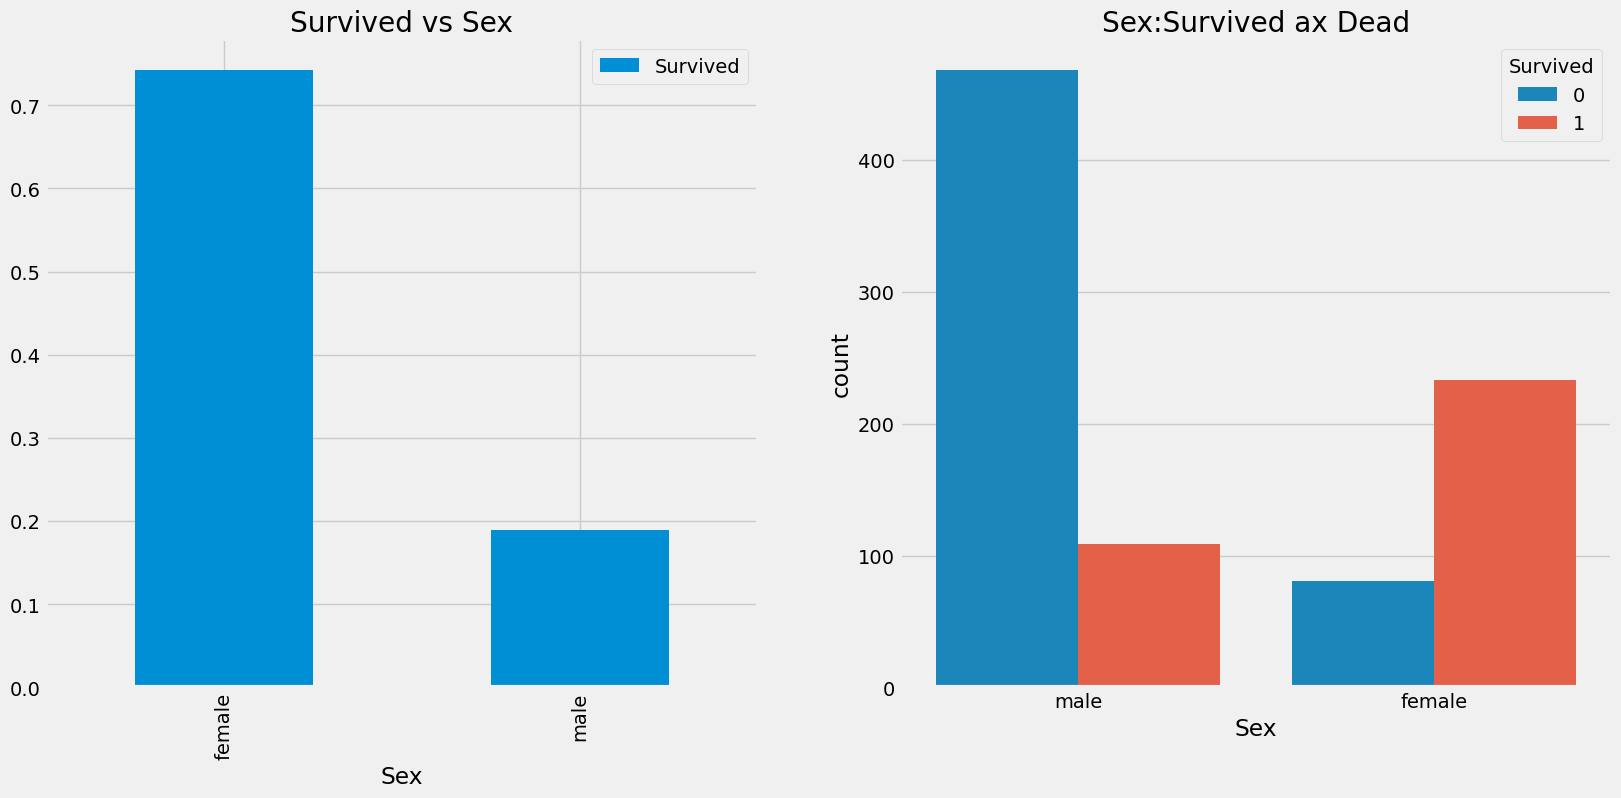

In [39]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived ax Dead')
plt.show()

배에 타고 있는 남성의 수는 여성의 수보다 훨씬 많음. 그럼에도 불구하고 여성의 수는 남성의 수보다 거의 두 배나 많음.
배에 타고 있는 여성 생존율은 약 75%인 반면, 남성의 생존율은 약 18~19%임.

In [35]:
# Ordinal Feature - Pclass

pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


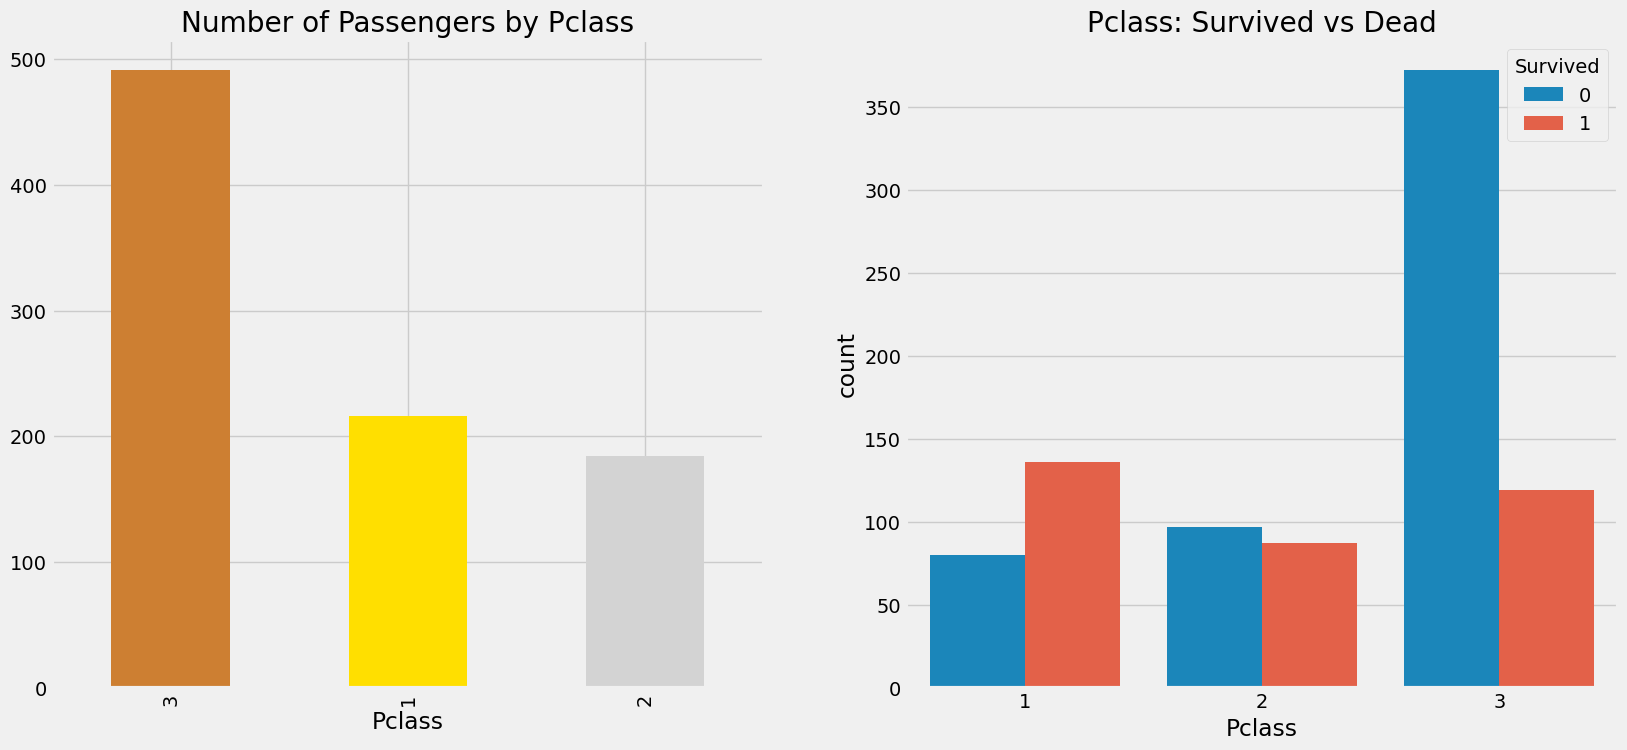

In [37]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

돈으로 모든 것을 살 수 없다고 말하지만.. 구조 과정에서 Pclass 1의 승객이 매우 높은 우선순위를 차지한 것을 분명히 알 수 있음.

Pclass 3의 승객 수는 훨씬 많았지만, 생존율은 약 25%로 매우 낮음.
Pclass 1의 생존율은 약 63%이고 Pclass 2의 생존율은 약 48%임. 따라서 돈과 지위가 중요.. 

Sex와 Pclass를 함꼐 사용해 생존율을 확인해보자.

In [44]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

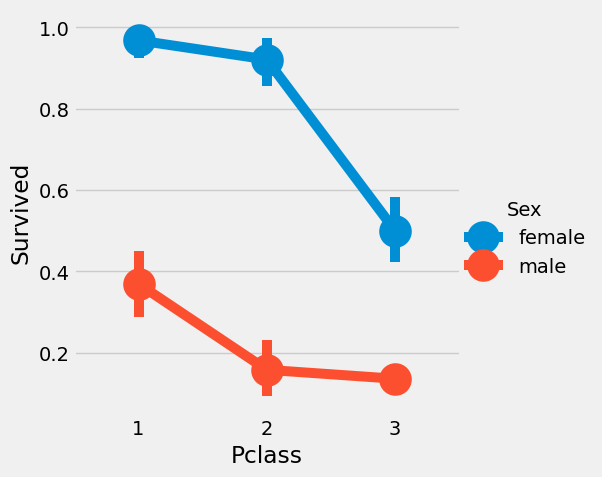

In [100]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

Pclass 1 여성의 생존율이 약 95~96%임을 쉽게 추론 가능. 이는 Pclass 1 여성 94 명 중 3명만이 사망.

Pclass에 관계없이 구조할 때 여성이 최우선 순위를 차지하는 건 분명함. Pclass 1 남성도 생존율이 매우 낮음.

Pclass도 중요한 기능을 함

In [61]:
# Continouw Feature - Age
print('Oldest Passenger was of :', data['Age'].max(), 'Years')
print('Youngest Passenger was of :', data['Age'].min(), 'Years')
print('Average Passenger was of :', data['Age'].mean(), 'Years')

Oldest Passenger was of : 80.0 Years
Youngest Passenger was of : 0.42 Years
Average Passenger was of : 29.69911764705882 Years


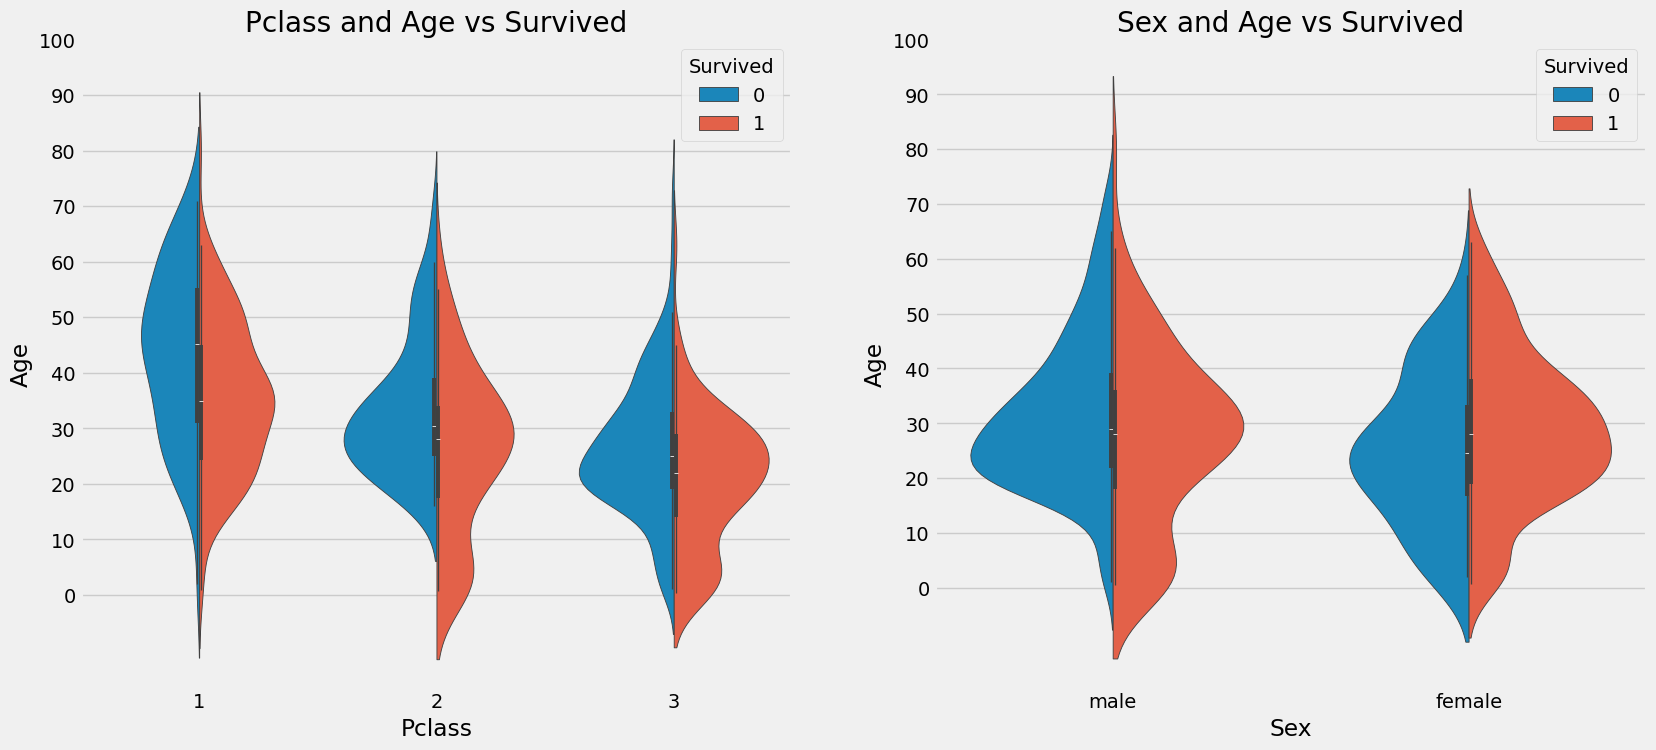

In [72]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

1. Pclass에 따라 어린이의 수가 증가하며, 10세 미만의 승객의 생존율은 Pclass의 관계없이 양호.
2. Pclass 1에서 20-50세 사이의 파세너거 생존 확률은 높으며, 여성에게는 더욱 좋음
3. 남성의 경우 나이가 들수록 생존 확률은 감소

Age는 177개의 null 값을 가지고 있음. 이러한 NA 값을 변경하려면 데이터 집합의 평균 연령의 평균 연령을 할당할 수 있음.
하지만 문제는 승객이 몇 살인지 알아내는 방법은? 이름 기능을 확인

In [77]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [79]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [81]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [83]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [85]:
# filling NaN Ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=4

In [87]:
data.Age.isnull().any()

False

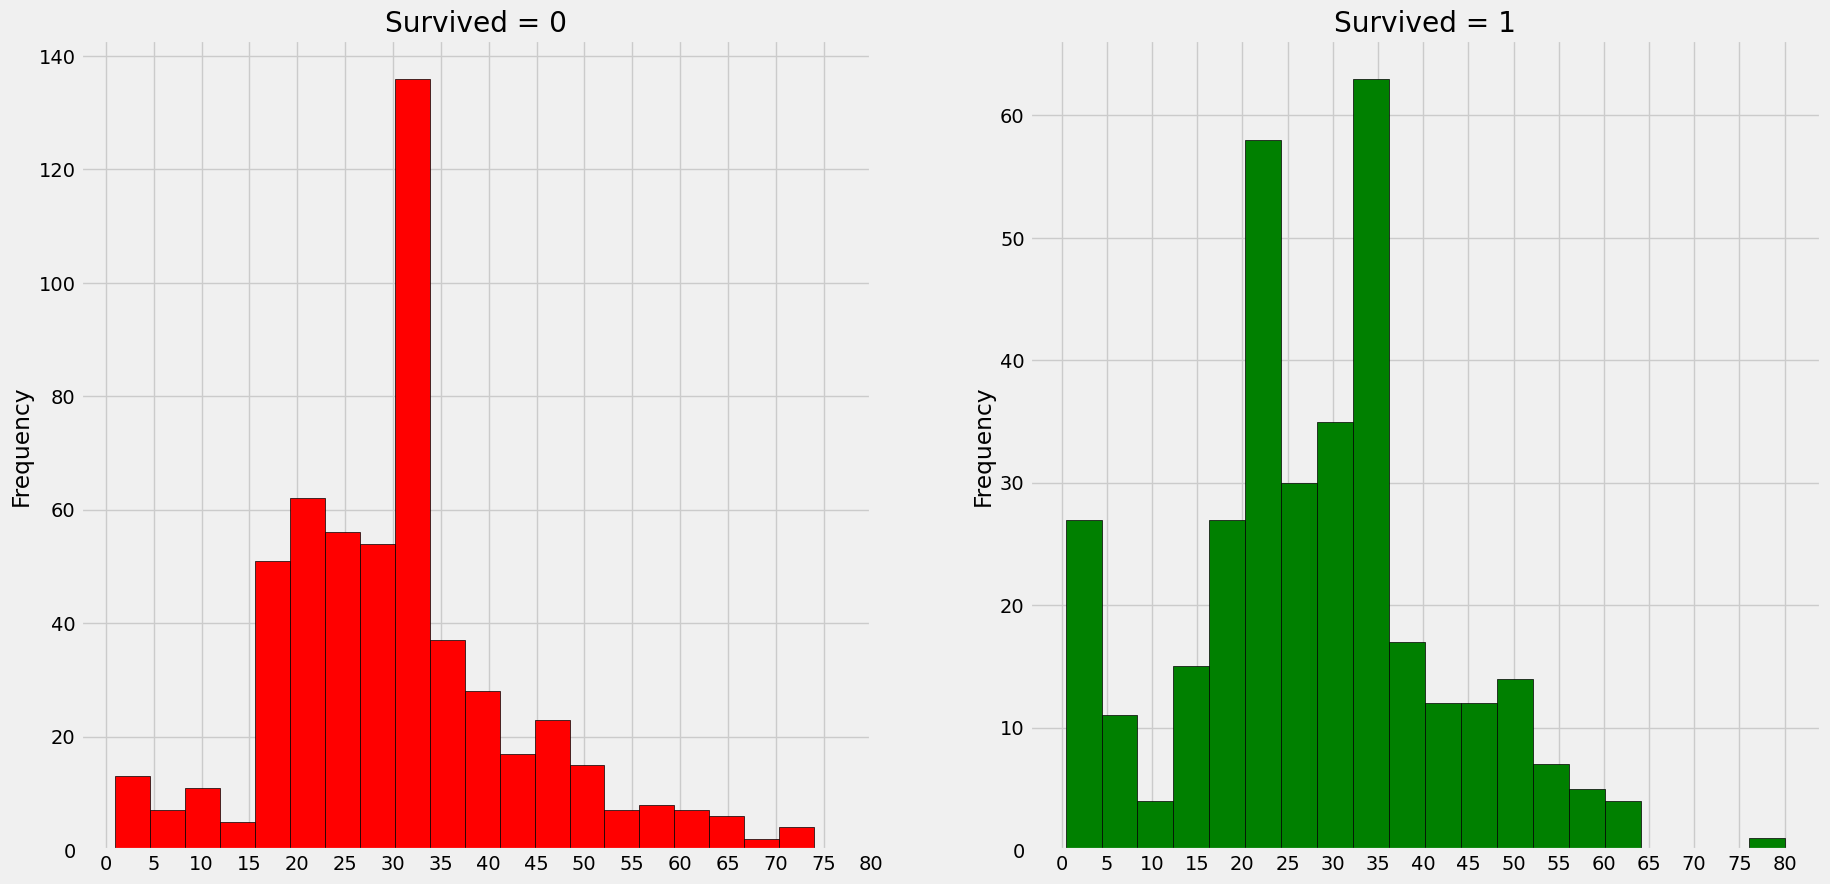

In [91]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(range(0,85,5))
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

1. 유아(5세 미만)는 대량으로 구제됨(여성 및 아동 우선 정책)
2. 가장 나이 많은 승객이 구조 됨(80년)
3. 최대 사망자 수는 30~40세 연령대

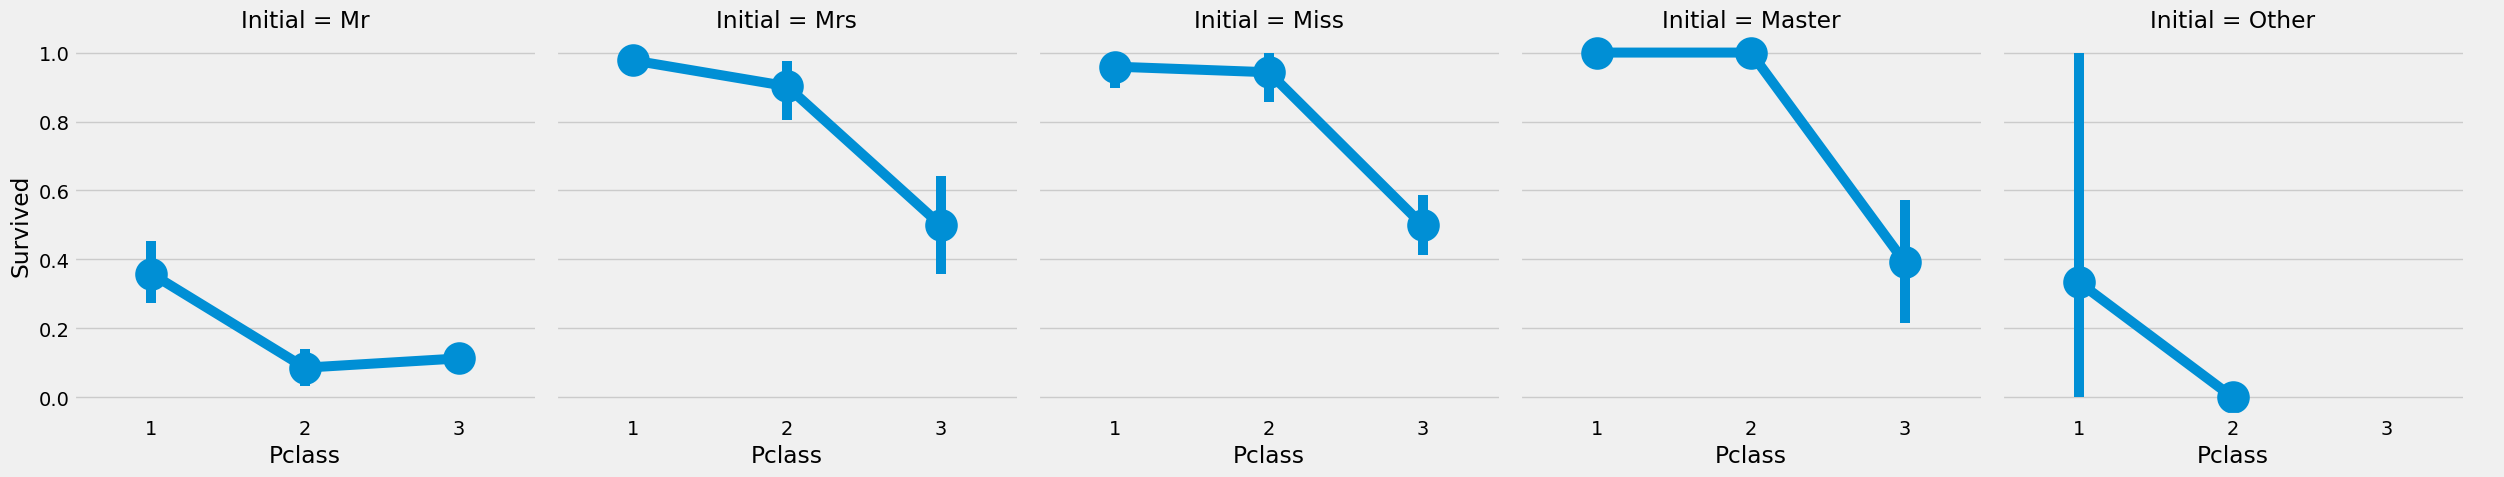

In [98]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()

여성과 아이의 우선 구조 정책의 class와 관계 없음

In [105]:
# Categorical Value - Embarked
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

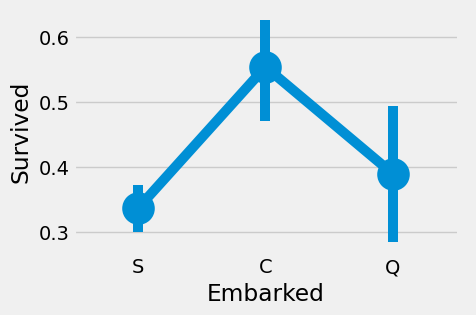

In [107]:
# Chances for Survival by Port Of Embarkation
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

포트 C의 생존률은 약 0.55인 반면, 포트 S의 생존율은 가장 낮음.

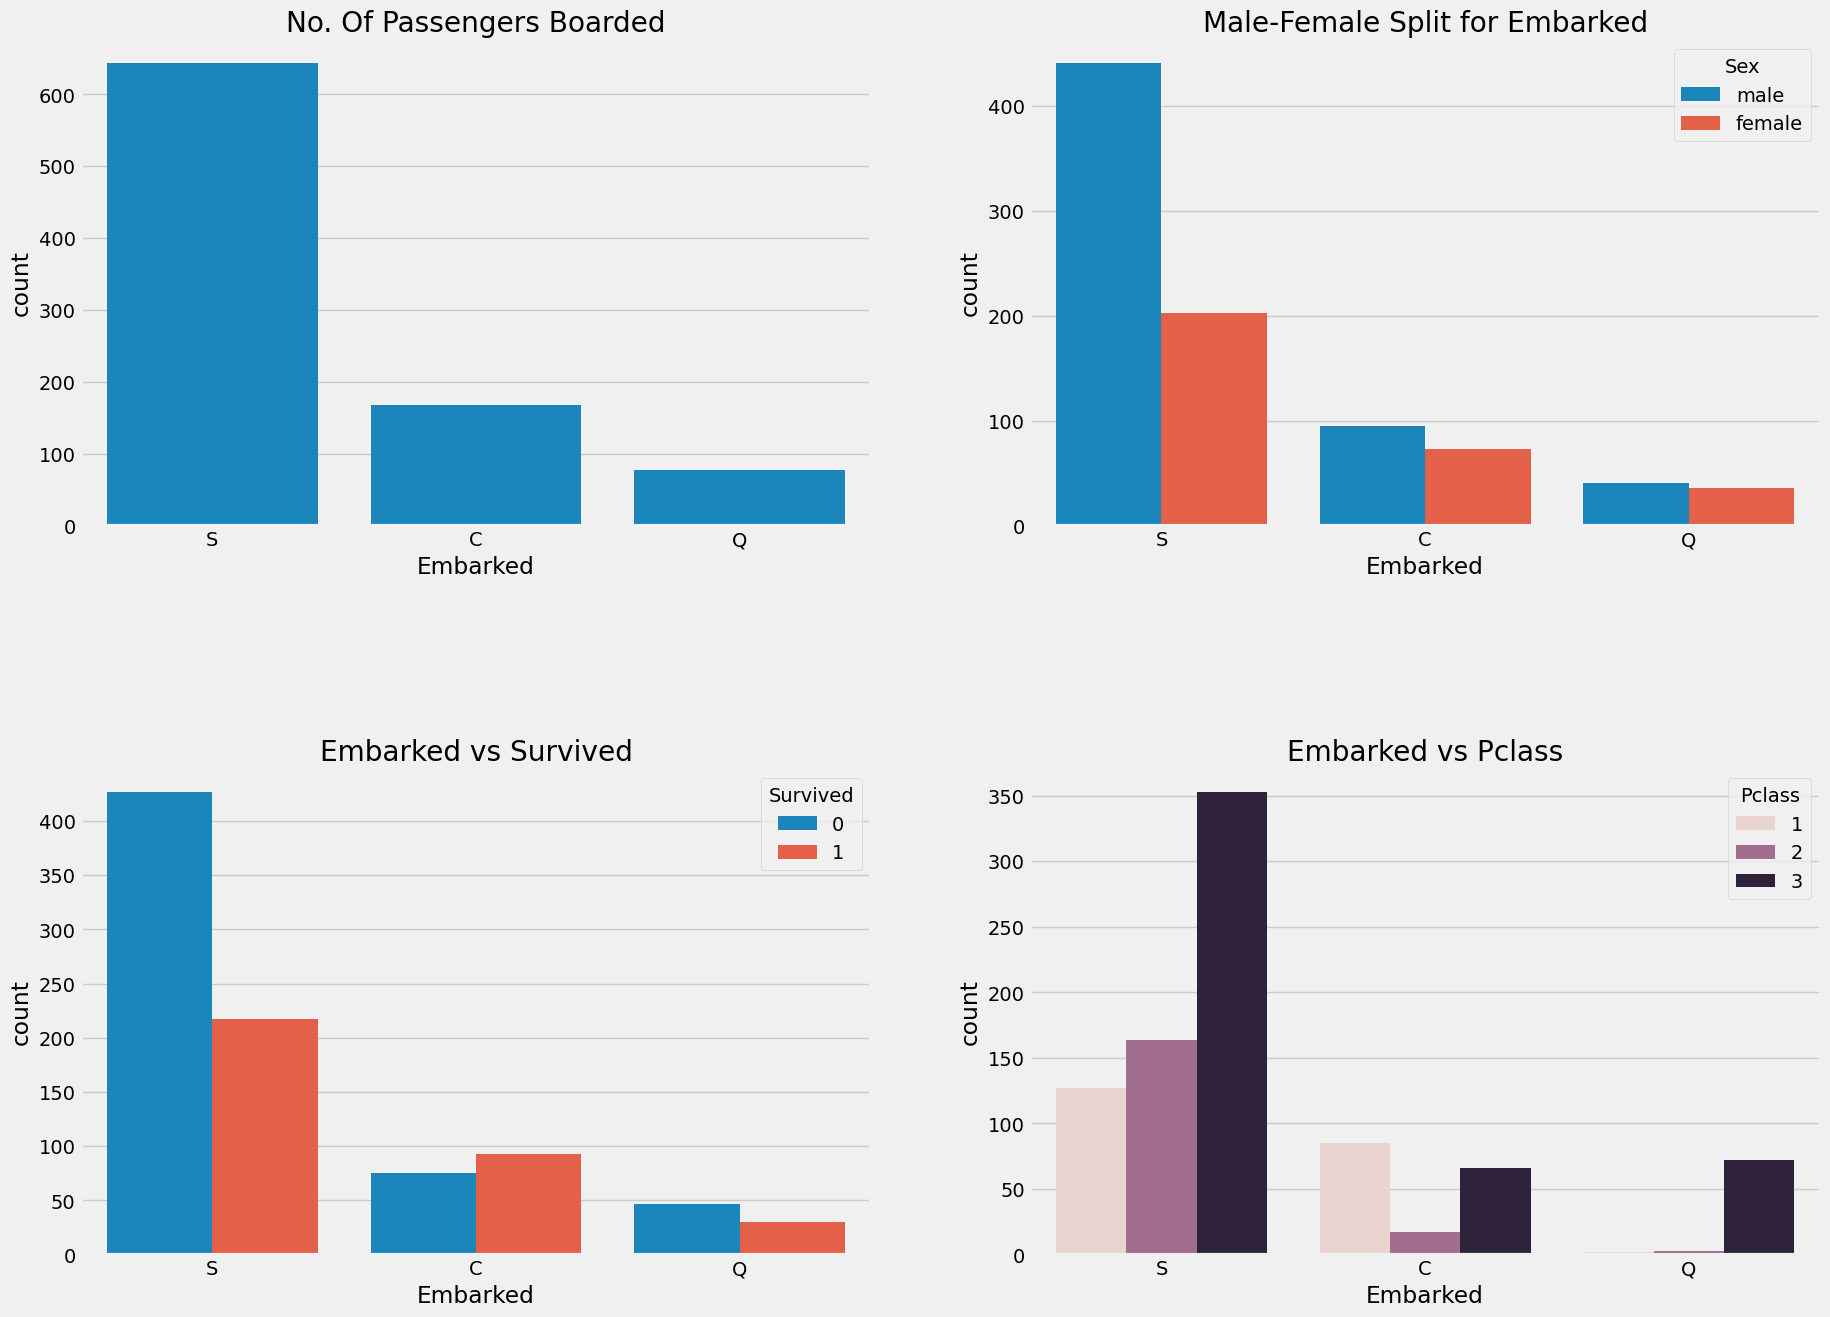

In [114]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1. S애서 탑승한 최대 승객은 대부분 Pclass 3에서 탑승
2. C에서 온 승객들은 많은 비율이 살아남았기 때문에 운이 좋음. 그 이유는 아마 모든 Pclass1 및 Pclass2 승객들을 구출했기 때문일 것
3. Embarked S는 대부분의 부유층이 탑승한 항구로 보임. 하지만 이곳에서 생존 가능성이 낮기 때문에 약 81%의 Pclass3 승객이 생존하지 못했기 떄문
4. 포트 Q는 승객의 거의 95%가 Pclass3에서 왔음.

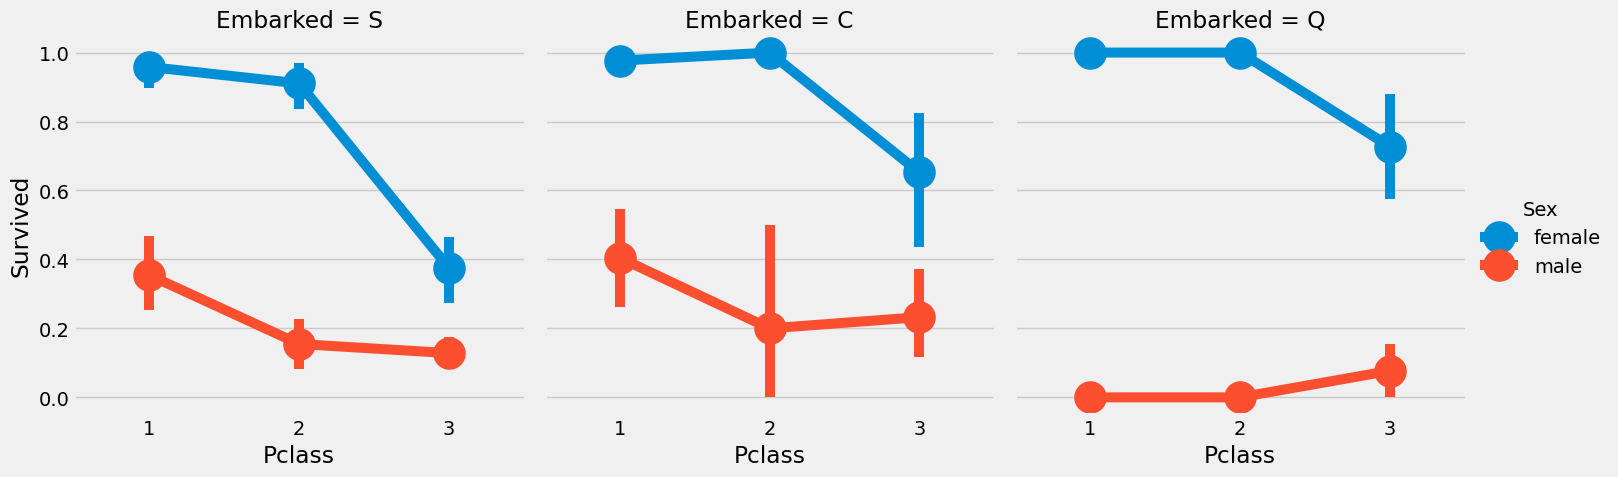

In [117]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()

1. 여성의 생존 확률은 Pclass1과 Pclass2에 관계없의 거의 1임.
2. 포트 S는 남성과 여성 모두의 생존율이 매우 낮기 때문에 Pclass3 Passenger에게 매우 불운해 보임
3. 포트 Q는 거의 모두 Pclass 3 출신이었기 때문에 남성들에게 가장 운이 좋지 않은 것 같음.

In [120]:
# filling Embarked NaN
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

False

In [122]:
# SibSip -> Discrete Feature
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


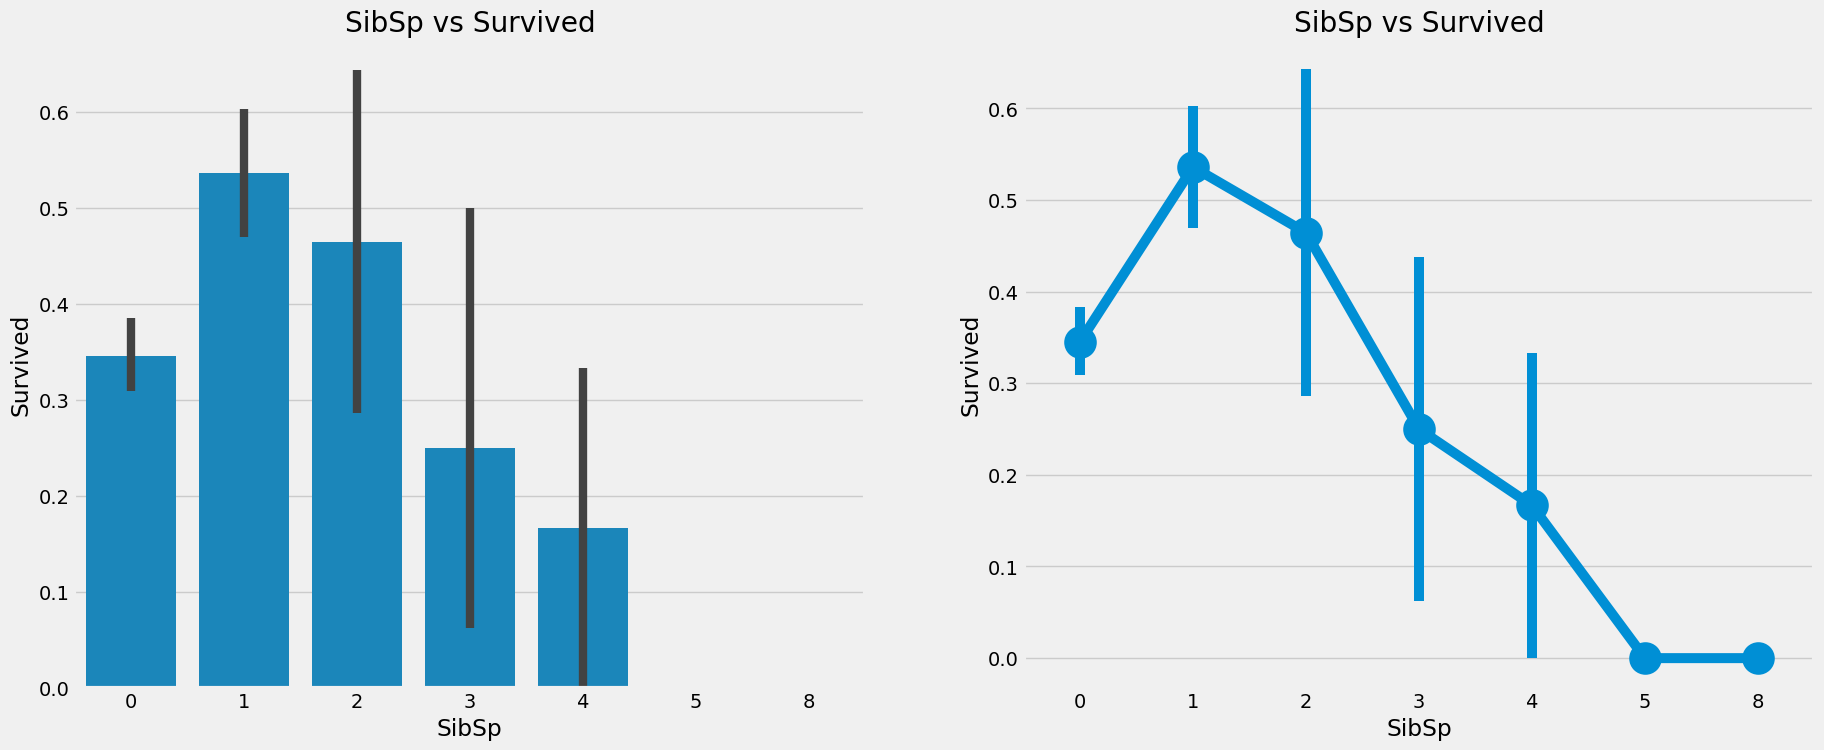

In [136]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [138]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


막대 그래프와 요인 그래프에 따르면 승객이 형제자매 없이 혼자 탑승한 경우 생존율은 35.8% 임. 형제자매 수가 증가하면 그래프는 대략적으로 감소. 즉, 가족이 탑승한 경우 먼저 자신을 구하기보다 가족을 구하려 노력할 것임. 5~8명의 가족의 생존율은 0% 임. 

그 이유는 Pclass 임. 크로스탭에 따르면 SibSp>3 인 사람은 모두 Pclass 3에 속해 있었음. Pclass 3(>3)의 모든 대가족이 사망할 가능성이 임박함.

In [141]:
# Parch
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


크로스탭은 다시 Pclass 3에서 대가족 형태를 보임.

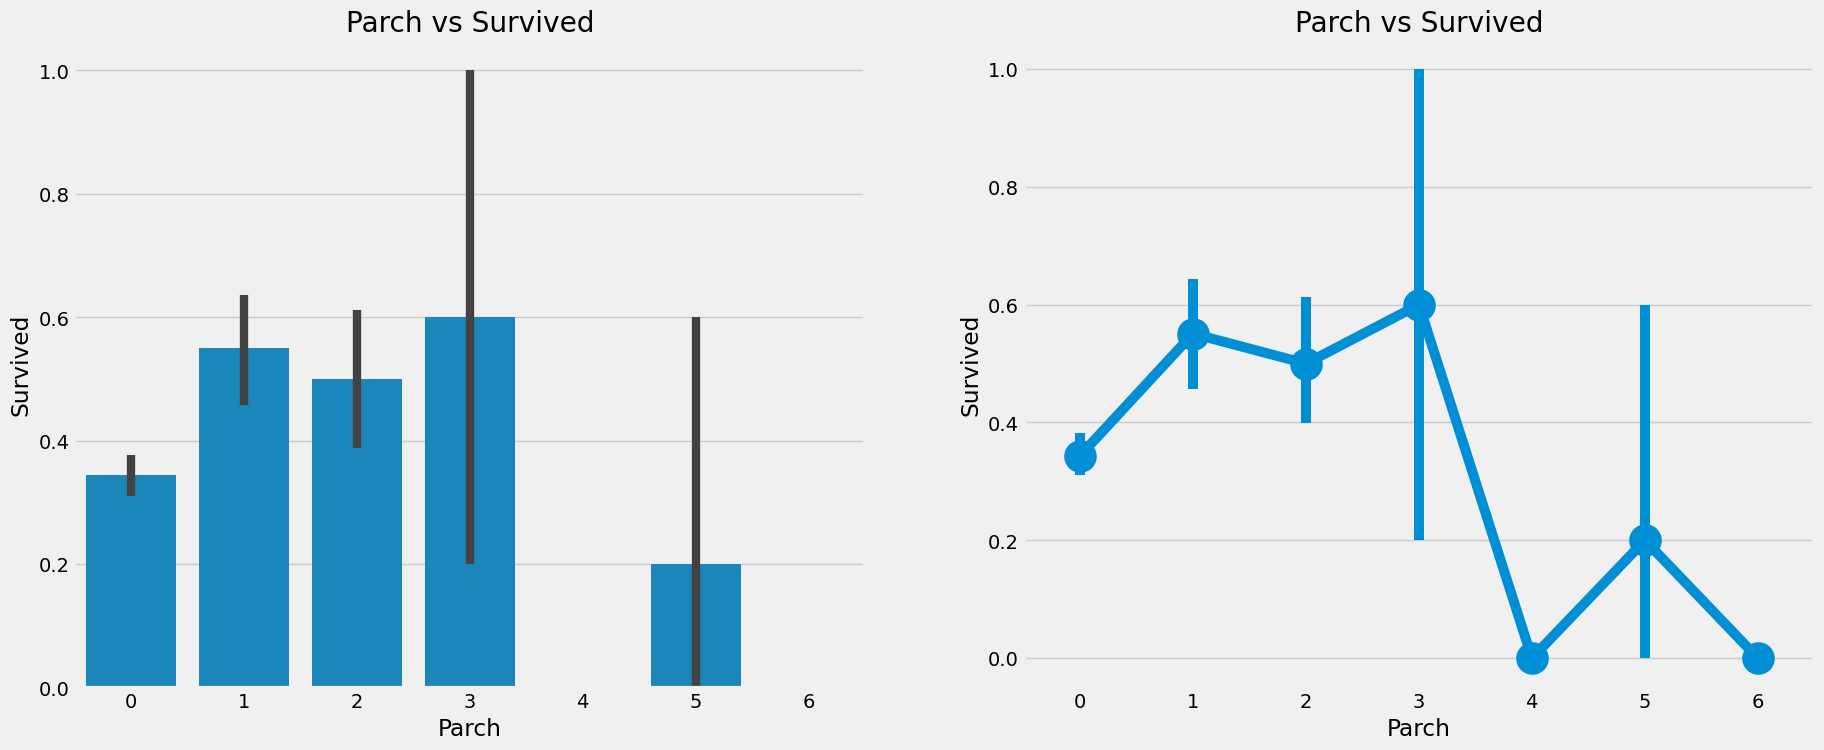

In [144]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

여기서도 결과가 상당히 비슷함. 부모님이 탑승한 승객은 생존 확률이 더 높음. 하지만 숫자가 증가할수록 생존률이 감소.

부모가 1~3명인 사람은 생존률이 높음. 부모가 4명 이상인 사람은 혼자 있는 것도 치명적이며 생존률이 낮아짐.

In [149]:
# Continuous Feature - Fare
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


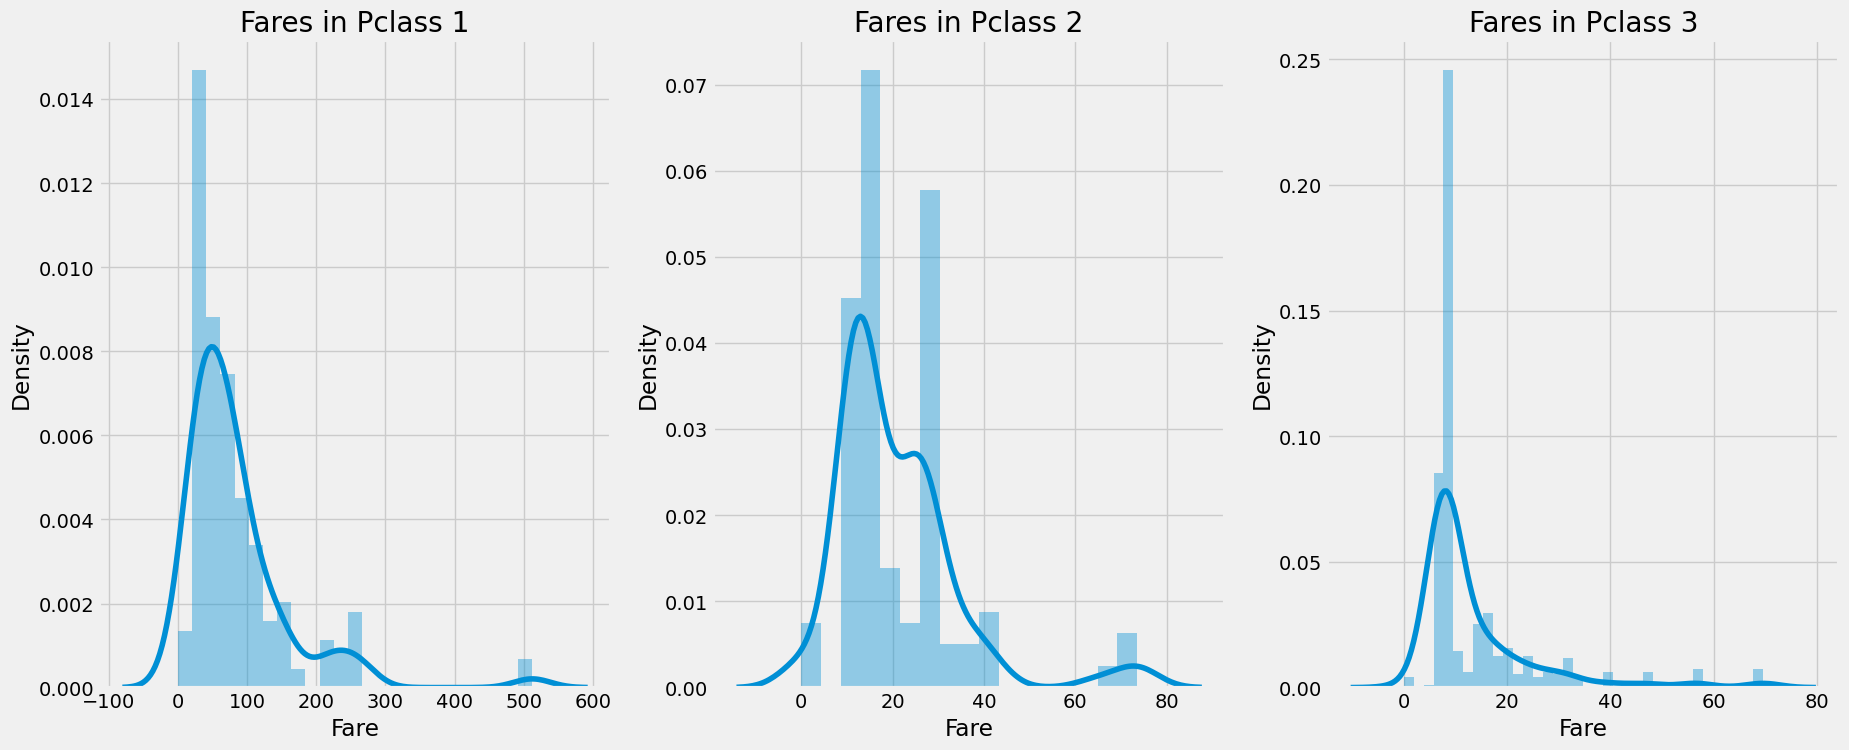

In [155]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass 1의 승객 요금에는 큰 분포가 있는 것으로 보이며, 기준이 줄어들수록 이 분포는 게속 감소. 이 또한 연속적이므로 비닝을 사용하여 이산 값으로 변환 가능

모든 기능에 대한 간단한 관찰 :

1. 성별 : 여성의 생존율은 남성에 비해 높음
2. Pclass : 일등석 승객이 되면 생존율이 높아진다는 눈에 보이는 추세가 있음. Pclass 3의 생존율은 매우 낮음. 여성의 경우 Pclass 1에서 생존할 확률은 거의 1이며 Pclass 2에서 생존할 확률도 높음.
3. 연령 : 5-10세 미만의 어린이는 생존율이 높음. 15-35세 사이의 승객은 많이 사망
4. 탑승 : 대부분 Pclass 1 승객이 S에서 일어났음에도 불구하고 C에서 생존할 확률이 더 높음. Q에서 승객은 모두 Pclass 3에서 왔음.
5. Parch + Sibsp : 1-2명의 형제자매, 배우자가 탑승하거나 1-3명의 부모가 혼자 있거나 대가족이 함꼐 여행하는 것보다 더 큰 확률을 보임.

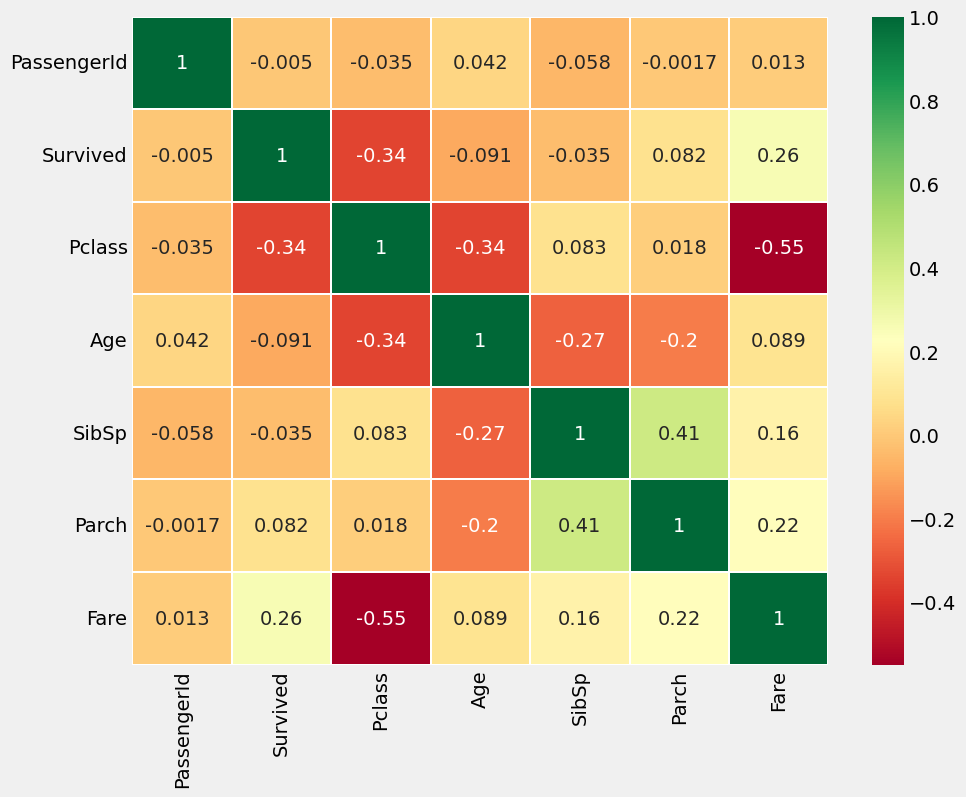

In [162]:
# Correlation Between The Feature
numeric_data = data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

가장 먼저 주목해야 할 점은 알파벳이나 문자열 사이에 상관관계가 없다는 것이 분명하기 때문에 숫자 특징만 비교한다는 것임. 
위의 히트맵에서 특징들이 크게 상관관계가 없다는 것을 알 수 있음. 가장 높은 상관관계는 SibSp와 Parch 0.41임. 

# Part2. 기능 엔지니어링 및 데이터 정리

기능을 갖춘 데이터 세트를 제공할 때마다 모든 기능이 중요할 때마다 모든 기능이 필요하지 않음. 제거돼야 하는 중복 기능이 많은 중복 기능이 있을 수도 있음. 또한 우리는 다른 기능에 대한 정보를 관찰하거나 추출해 새로운 기능을 얻을 수 있음. 예를 들어 이름 기능을 사용해 초기 기능을 얻을 수 있음. 새로운 기능을 얻을 수 있는지 확인하고 몇 가지 제거. 또한 예측형 모델링에 적합한 양식을 변환하기 위해 기존 관련 기능을 제공

### 나이 밴드

연령 기능 및 문제 : 나이보다 앞서 언급한 바와 같이, 기계 학습 모델에서 지속적인 변수가 있음.
비닝 또는 정상화를 통해 범주형 값을 분류해야 함. 승객의 최대 나이는 80세임. 따라서 0-80에서 범위를 5개의 빈으로 분할 -> 16

In [170]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [172]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


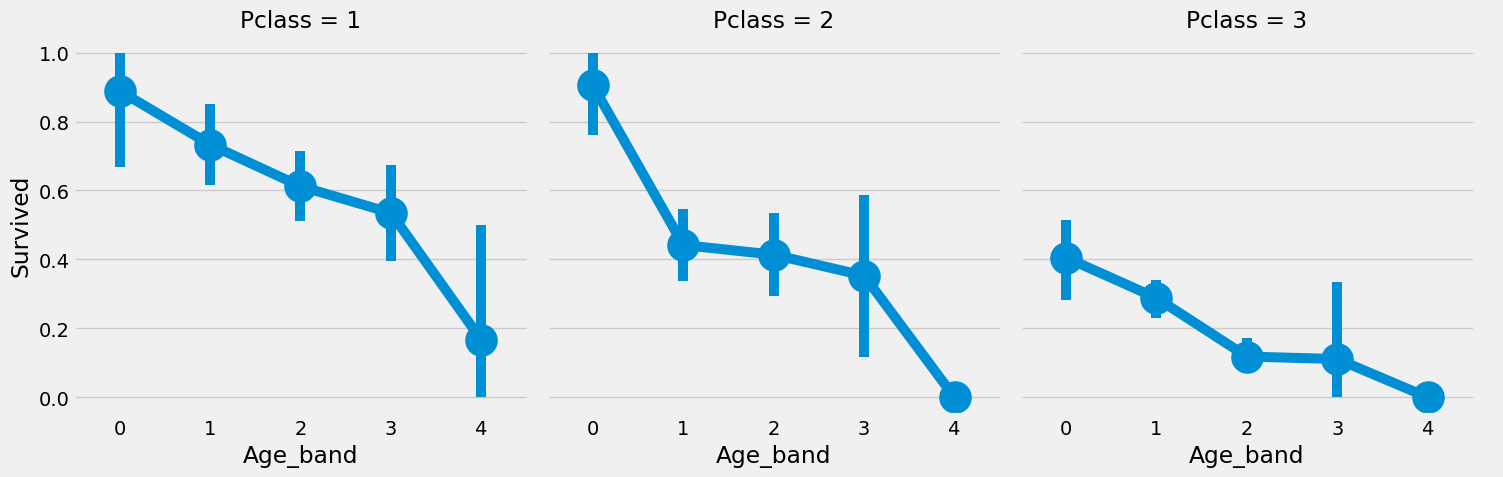

In [178]:
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()

Pclass에 관계없이 나이가 들수록 생존율이 감소.

가족_사이즈 및 혼자

이 시점에서 family_size와 alone이라는 새로운 기능을 생성하고 이를 분석할 수 있음. 이 기능은 Parch와 Sibsp의 합산임. 승객의 생존율이 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공. 단독으로 승객이 혼자인지 여부를 표시

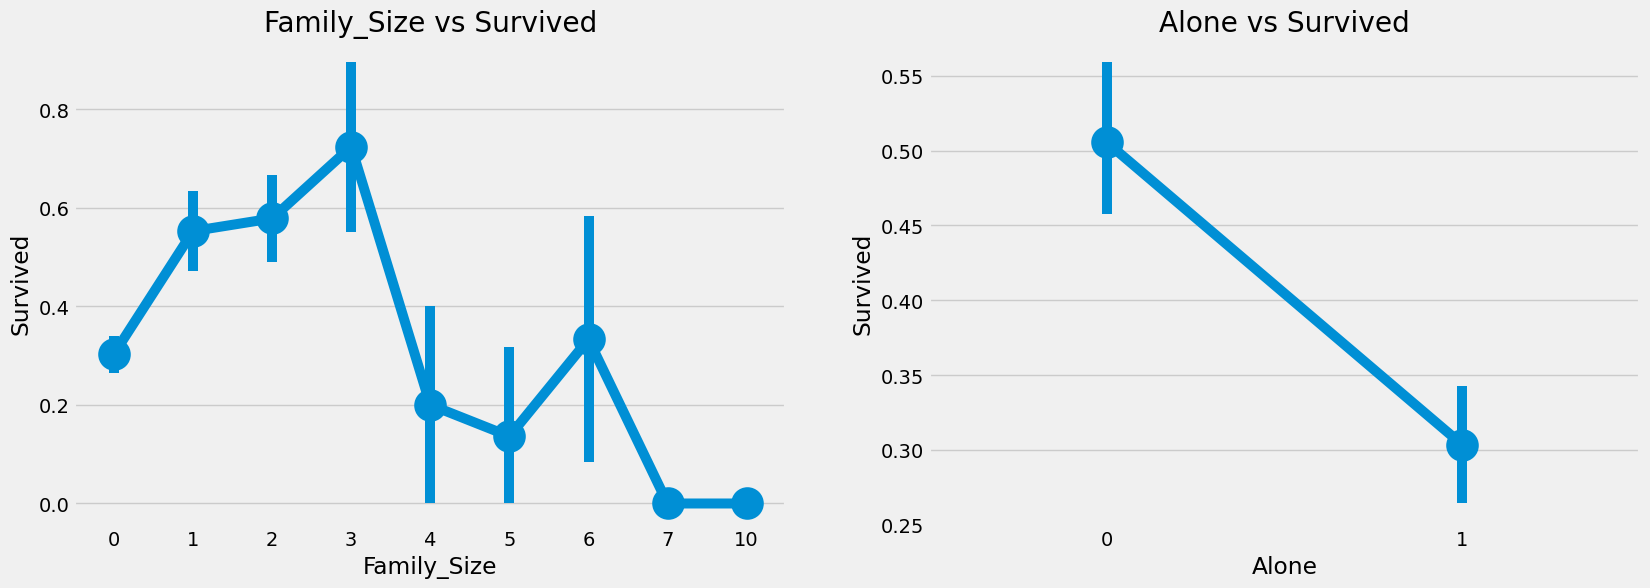

In [193]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1

f, ax = plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

family_Size=0은 지나가는 사람이 혼자라는 것을 의미. 분명이 혼자이거나 family_Size=0인 경우 생존율이 매우 낮음.

가족 크기가 4를 초과하면 생존율도 감소. 이는 또한 모델에 중요한 기능으로 보임.

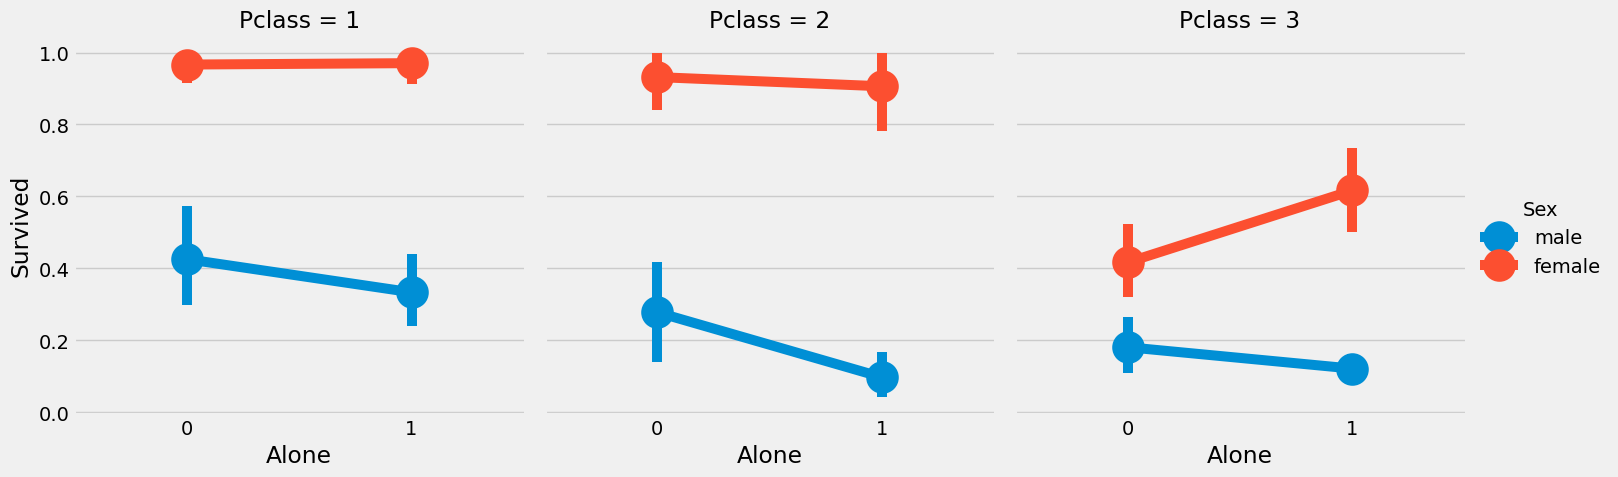

In [198]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()

혼자 있는 여성이 가족이 있는 여성보다 혼자 있을 가능성이 높은 Pclass 3를 제외하고 성별이나 Pclass와 상관없이 혼자 있는 것이 해롭다는 것을 알 수 있음.

### Fare Range

요금도 연속적인 기능이므로 이를 순서 값으로 변환해야 함. 이를 위해 panda.qcut을 사용.
따라서 큐컷을 통과한 빈의 수에 따라 값을 분할하거나 배열하는 역할을 함. 따라서 5개의 빈을 통과하면 값이 5개의 개별 빈 또는 값 범위로 균등하게 배열됨.

In [205]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의한 바와 같이, 요금 범위가 증가함에 따라 생존율이 높아진다는 것을 분명히 알 수 있음.

이제 Fare_Range 값을 그대로 전달할 수 없음. Age_Band에서 같이 싱글톤 값으로 변환해야 함.

In [208]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_cat']=3

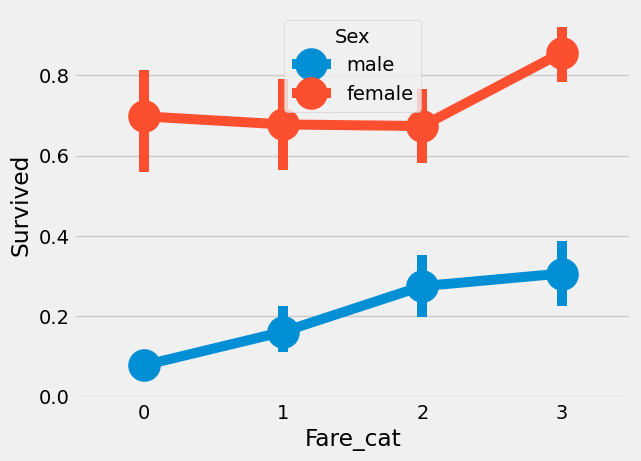

In [210]:
sns.pointplot(x='Fare_cat', y='Survived', data=data, hue='Sex')
plt.show()

분명히 Fare_cat이 증가함에 따라 생존율이 높아짐. 이 기능은 성별과 함꼐 모델링할 때 중요 기능이 될 수 있음.

In [213]:
# 문자열 값을 숫자형 값으로 변환하기
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

불필요한 기능 삭제

Name, Age, Ticket, Fare, Cabin, Fare_Range, PassengerId

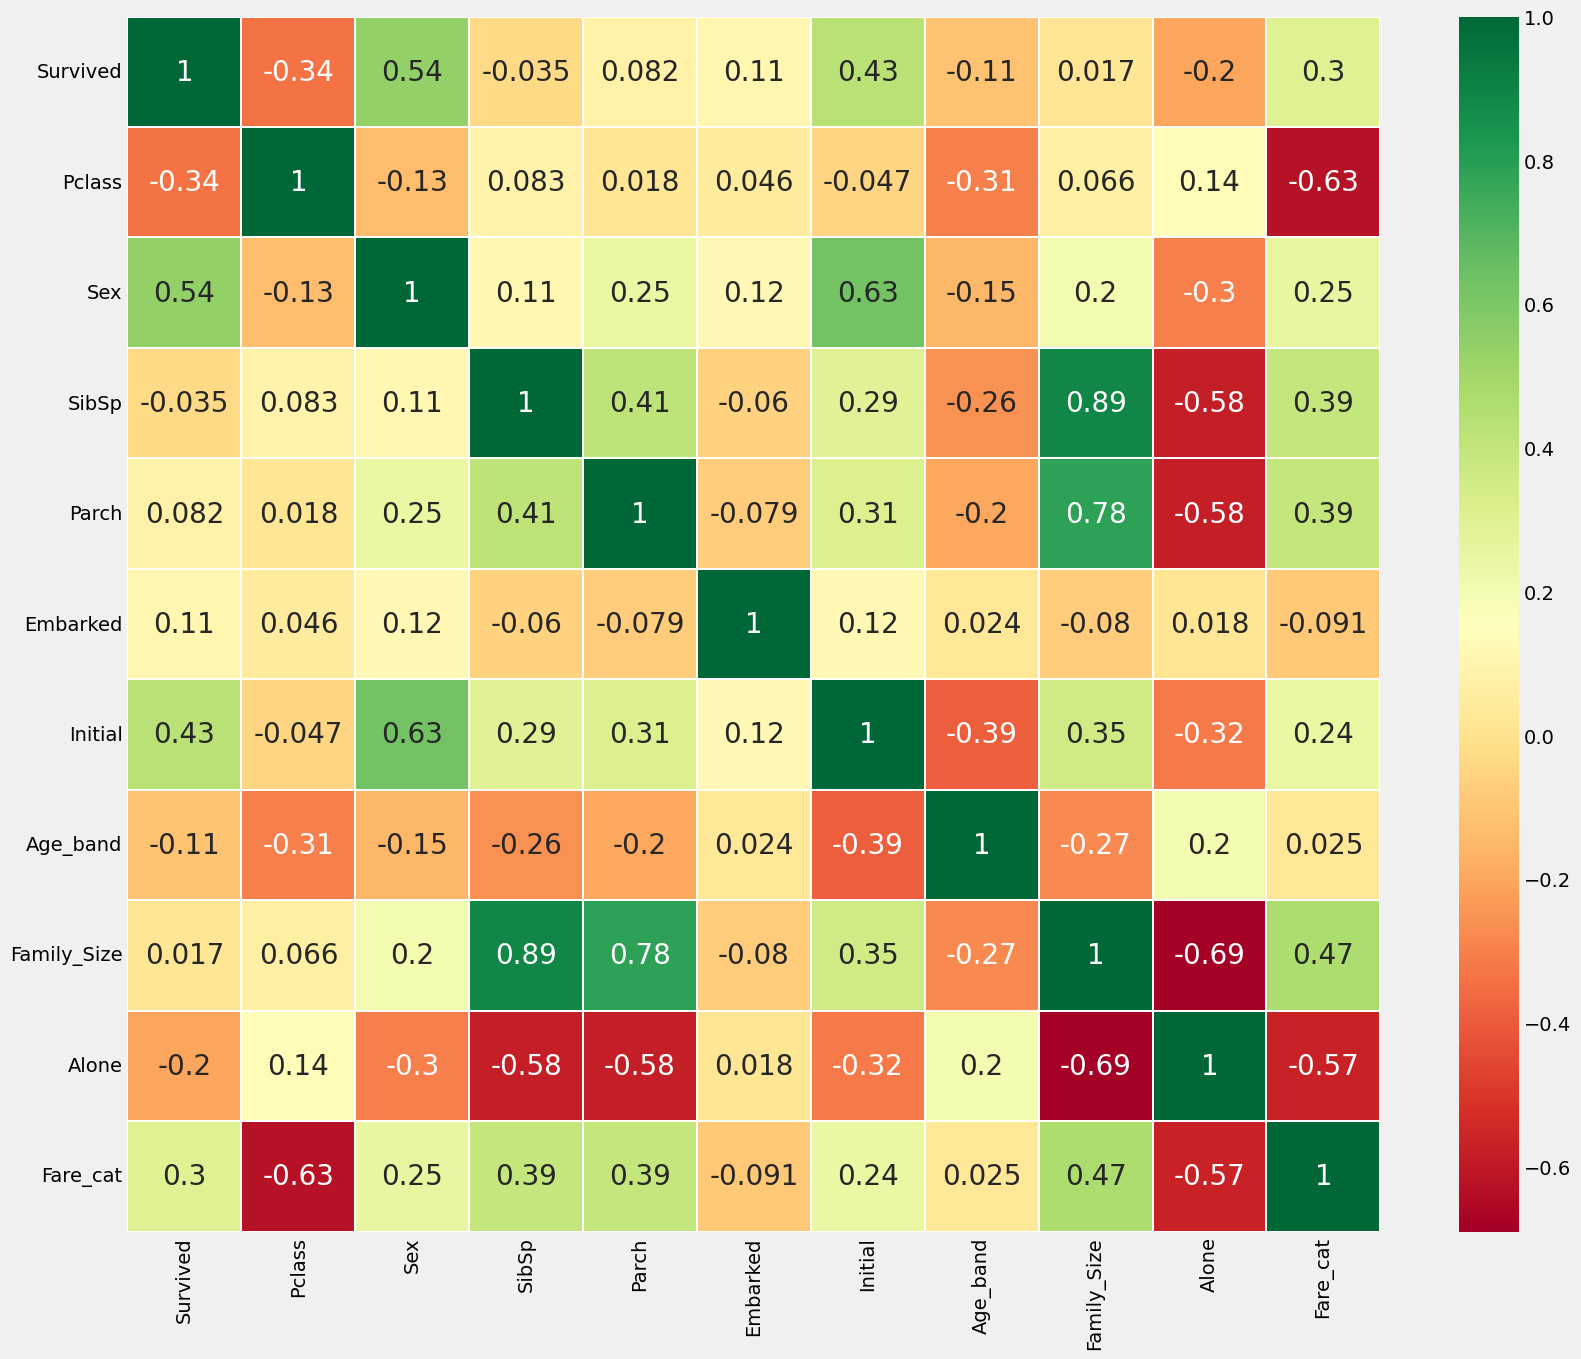

In [218]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'],axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

위의 상관관계 도표에서 긍정적으로 관련된 몇 가지 특징을 볼 수 있음. 그 중 일부는 SibSp와 Family_Size, Parch and Family_Size 그리고 Alone and Family_Size 와 같은 부정적인 특징들임.

# Part3: 예측 모델링

In [229]:
# import ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [235]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

In [271]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


In [273]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


In [275]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

Accuracy for the Logistic Regression is 0.8134328358208955


In [277]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

Accuracy for the Decision Tree is 0.8134328358208955


In [279]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for the KNN is', metrics.accuracy_score(prediction5, test_Y))

Accuracy for the KNN is 0.8134328358208955


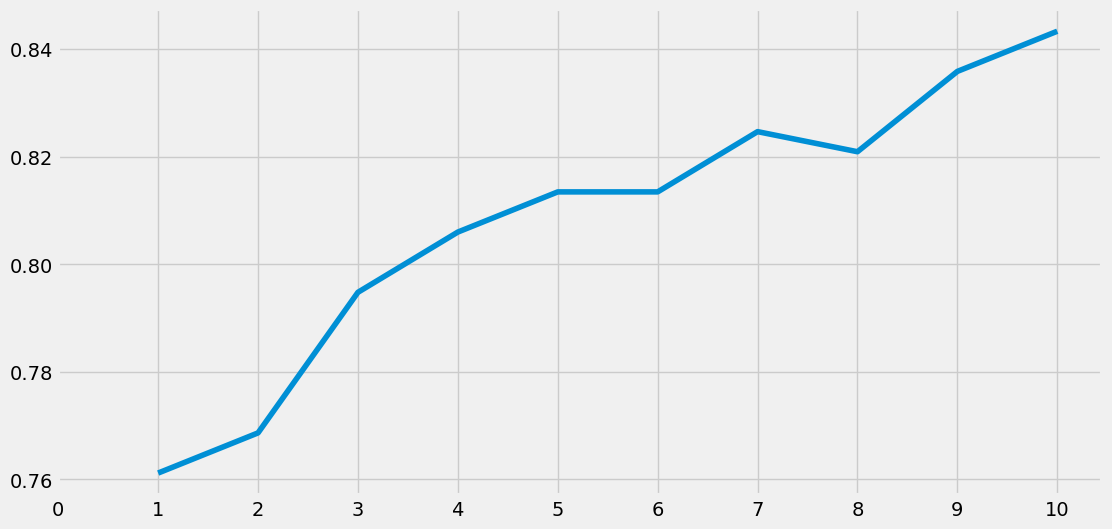

Accuracies for different values of n are: [0.76119403 0.76865672 0.79477612 0.80597015 0.81343284 0.81343284
 0.82462687 0.82089552 0.8358209  0.84328358] with the max value as 0.8432835820895522


In [281]:
a_index = list(range(1,11))
a_values = []

x = [0,1,2,3,4,5,6,7,8,9,10]
for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    acc = metrics.accuracy_score(prediction, test_Y)
    a_values.append(acc)

a = pd.Series(a_values)

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as', a.values.max())

In [283]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

Accuracy for the NaiveBayes is 0.8134328358208955


In [285]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for the RandomForest is', metrics.accuracy_score(prediction7, test_Y))

Accuracy for the RandomForest is 0.8171641791044776


모델의 정확성만이 분류기의 견고성을 결정하는 유일한 요소는 아님. 분류기가 학습 데이터를 통해 학습되고 테스트 데이터를 통해 테스트되었으며, 90%의 정확도를 기록했다고 가정해보자.

이제 이것은 분류기로서는 매우 좋은 정확도인 것 같지만, 새로 출시되는 모든 테스트 세트에 대해 90%가 된다는 것을 확인할 수 있을까? 분류기가 어떤 인스턴스를 사용해 스스로 학습할지 결정할 수 없기 때문에 대답은 'NO'이다. 학습 및 테스트 데이터가 변경되면 정확도가 달라짐. 증가하거나 감소 가능. 이를 모델 분산이라고 함.

이를 극복하고 일반화된 모델을 얻기 위해 교차 검증을 사용

### 교차 검증

데이터가 불균형 경우가 많음. 즉, Class 1 인스턴스의 수는 많지만 다른 클래스 인스턴스의 수는 적을 수 있음. 따라서 우리는 데이터셋의 각 인스턴스에 대해 알고리즘을 훈련하고 테스트 해야 함. 그런 다음 데이터셋에 대해 언급된 모든 정확도의 평균을 취할 수 있음.

1) K-fold 교차 검증은 먼저 데이터셋을 K-부분 집합으로 나누는 방식으로 작동
2) 데이터셋을 k=5 부분으로 나눈다고 가정해보자. 테스트를 위해 1부분을 예약하고 나머지 4 부분에 걸쳐 알고리즘을 학습시킴.
3) 각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 학습시켜 프로세스를 계속 진행. 그런 다음 정확도와 오류를 평균화하여 알고리즘의 평균 정확도를 얻음. 이를 "K-fold 교차 검증"이라고 함.
4) 알고리즘은 일부 학습 데이터에 대해 데이터 세트에 과소 적합할 수 있으며, 때로는 다른 학습 세트에 대해 데이터를 과대 적합할 수 있음. 따라서 교차 검증을 통해 일반화된 모델을 달성할 수 있음.

In [295]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'), LogisticRegression(),KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv=kfold, scoring="accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std' : std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.812672,0.044030
Decision Tree,0.811498,0.033272
Naive Bayes,0.801386,0.028999
Random Forest,0.815968,0.031649


<Axes: >

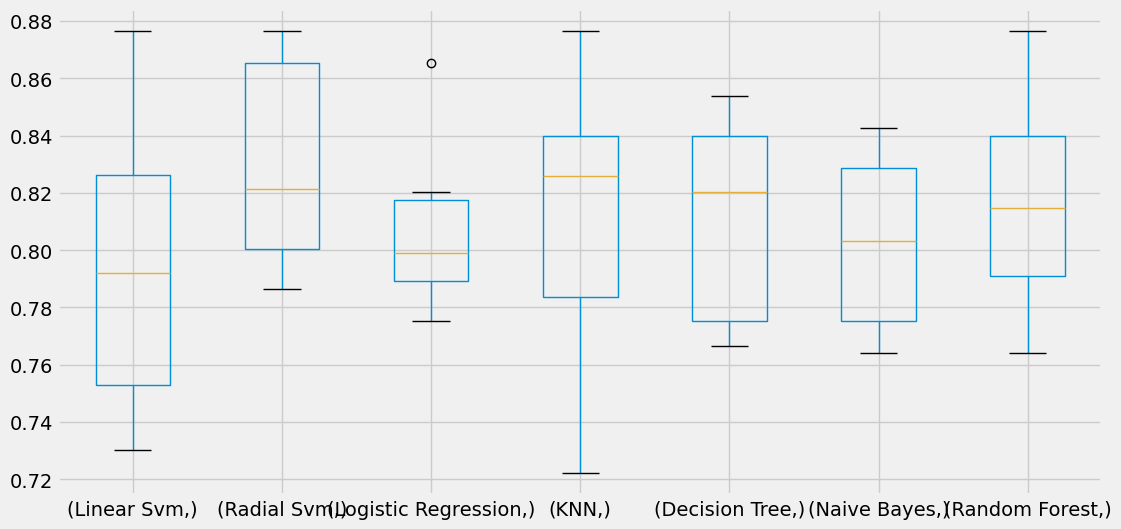

In [297]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

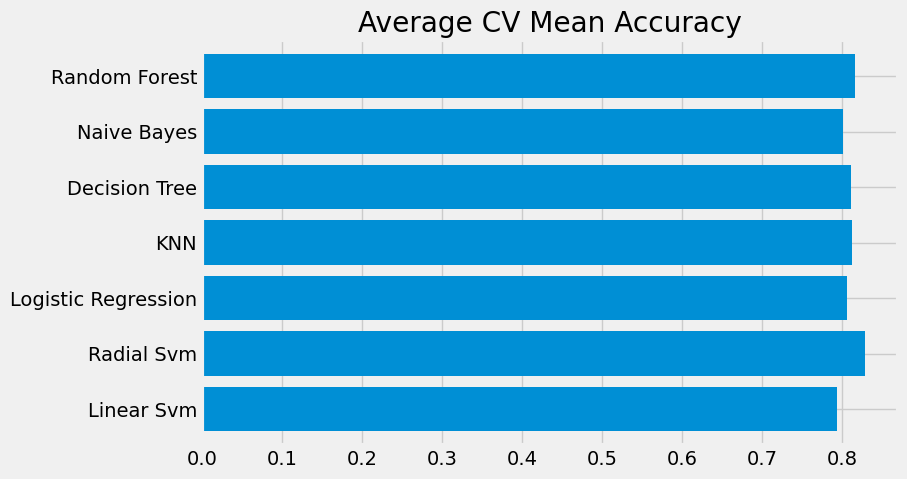

In [299]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

불균형으로 인해 분류 정확도가 때떄로 오해의 소지가 있을 수 있음. 모델이 어디에서 잘못되었는지 또는 모델이 예측한 클래스를 보여주는 혼동 행렬을 통해 요약된 결과를 얻을 수 있음.

### 혼동 행렬

분류기가 만든 올바른 분류와 잘못된 분류의 수를 알려줌

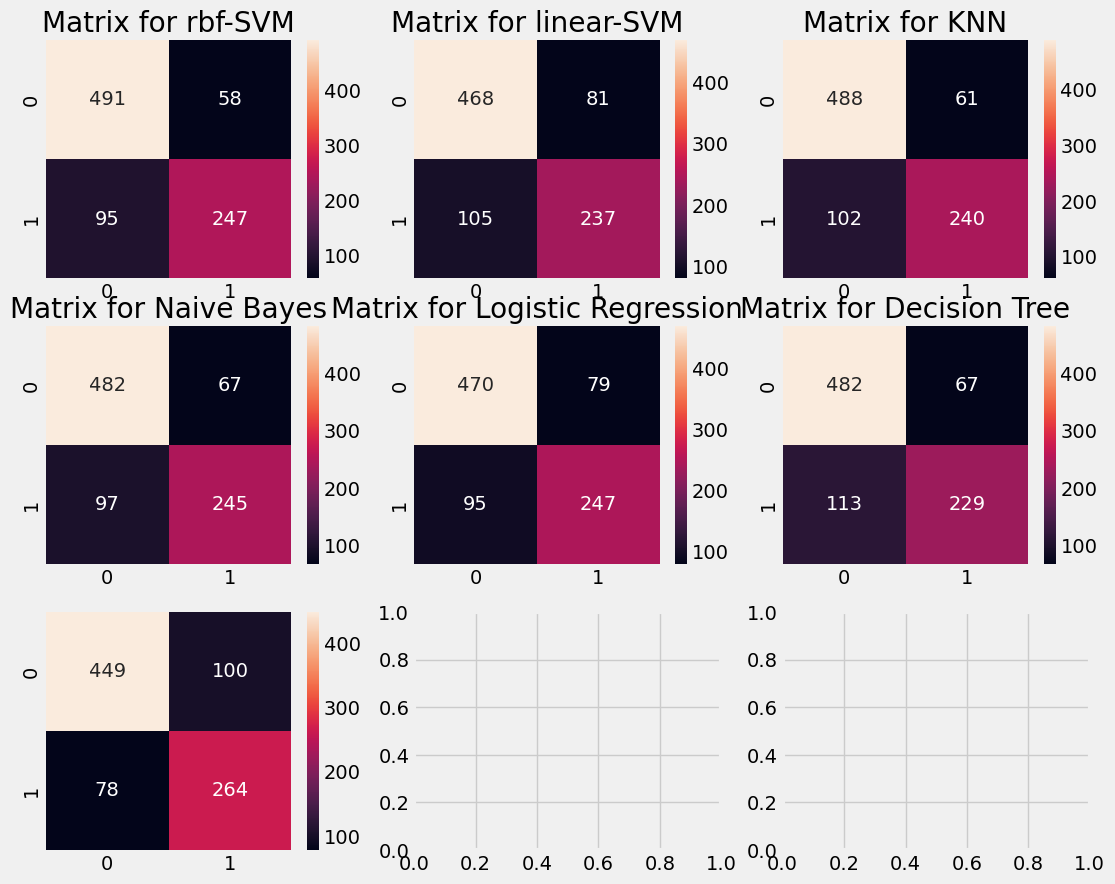

In [303]:
f, ax = plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

혼동 행렬의 해석

왼족 대각선은 각 클래스에 대해 올바른 예측을 한 횟수를 나타내고 오른쪽 대각선은 잘못된 예측을 한 횟수를 나타냄. rbf-SVM의 첫 번째 그래프를 고려해보자.

1) 정확한 예측의 수는 491(사망) +  247(생존)이며, 평균 CV 정확도는 (491+247)/891 = 82.8% 로 이전에 얻음.
2) 오류 -> 58명의 사망자를 생존자로 잘못 분류하고 95명을 생존자로 분류. 따라서 사망자를 생존자로 예측하여 더 많은 실수를 저지름.

모든 행렬을 보면 rbf-SVM이 죽은 승객을 정확하게 예측할 확률이 더 높지만, 나이브베이즈는 살아남은 승객을 정확하게 예측할 확률이 더 높다고 말할 수 있음.


### 하이퍼 파라미터 튜닝

ML model은 블랙박스와 같음. 이 블랙박스에 몇 가지 기본 매개변수 값이 있으며, 이를 조정하거나 변경하여 더 나은 모델을 얻을 수 있음. SVM 모델의 C와 감마 및 분류기마다 유사하게 다른 매개변수를 하이퍼 파라미터라고 하며, 이를 조정하여 알고리즘의 학습 속도를 변경하고 더 나은 모델을 얻을 수 있음. 이를 하이퍼 파라미터 튜닝이라고 함.

우리는 SVM과 랜덤 포레스트라는 두 가지 최고의 분류기를 위해 하이퍼 파라미터를 조정할 것임.

In [314]:
# SVM

from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf','linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [316]:
# Random Forests

n_estimators = range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.82045069361622
RandomForestClassifier(n_estimators=400, random_state=0)


The best score for Rbf-Svm is 82.82% with C=0.4, gamma=0.3. For RandomForest, score is abt 82.0% with n_estimators=400.

### Ensemnling

앙상블은 모델의 정확도나 성능을 높이는 좋은 방법임. 간단히 말해, 다양하고 간단한 모델을 결합해 하나의 강력한 모델을 만드는 것. 

In [338]:
# voting Classifier

from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)), 
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)), 
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)), 
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier()),
                                                ('NB', GaussianNB()),
                                                ('svm',svm.SVC(kernel='linear',probability=True))],
                                    voting='soft').fit(train_X, train_Y)
print('The acuuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The acuuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357055


### Bagging

배깅은 일반적인 앙상블 방법임. 이 방법은 데이터셋의 작은 파티션에 유사한 분류기를 적용한 다음 모든 예측의 평균을 구하는 방식으로 작동함. 평균화로 인해 분산이 감소. 투표 분류기와 달리 배깅은 유사한 분류기를 사용함.

In [343]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8137952559300874


In [345]:
# Bagging Decision Tree
model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged KNN is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8160174781523096


### Boosting

부스팅은 분류기의 순차적 학습을 사용하는 앙상블 기법임. 약한 모델을 단계별로 향상시키는 것. 부스팅은 다음과 같이 작동함.

모델은 먼저 전체 데이터 세트에 대해 훈련됨. 이제 모델은 몇 가지 인스턴스를 맞추고 일부 인스턴스는 틀림. 이제 다음 반복에서는 학습자가 잘못 예측된 인스턴스에 더 집중하거나 더 많은 가중치를 부여함. 따라서 학습자는 잘못된 인스턴스를 올바르게 예측하려고 함. 이제 이 반복 과정은 계속되며 정확도에 한계에 도달할 때까지 모델에 새로운 분류기가 추가됨.

In [350]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [352]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [354]:
# XGBoost

import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result= cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


We got the highest accuracy for AdaBoost.

In [360]:
# Hyper-Parameter Tuning for AdaBoost
n_estimators=list(range(100,1100,100))
learn_rate = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


The maximum accuracy we can get with AdaBoost is with n_estimators=100 and learning_rate=0.1

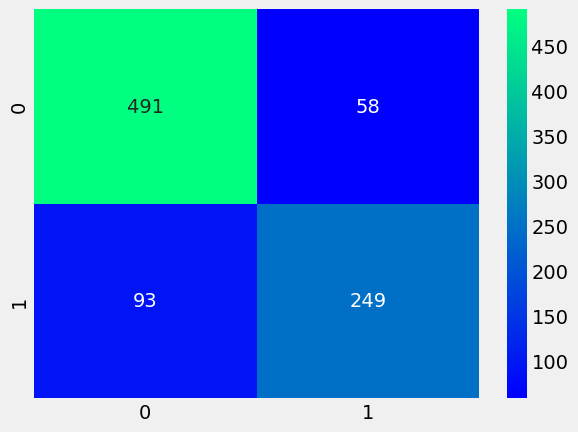

In [364]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

### Feature Importance

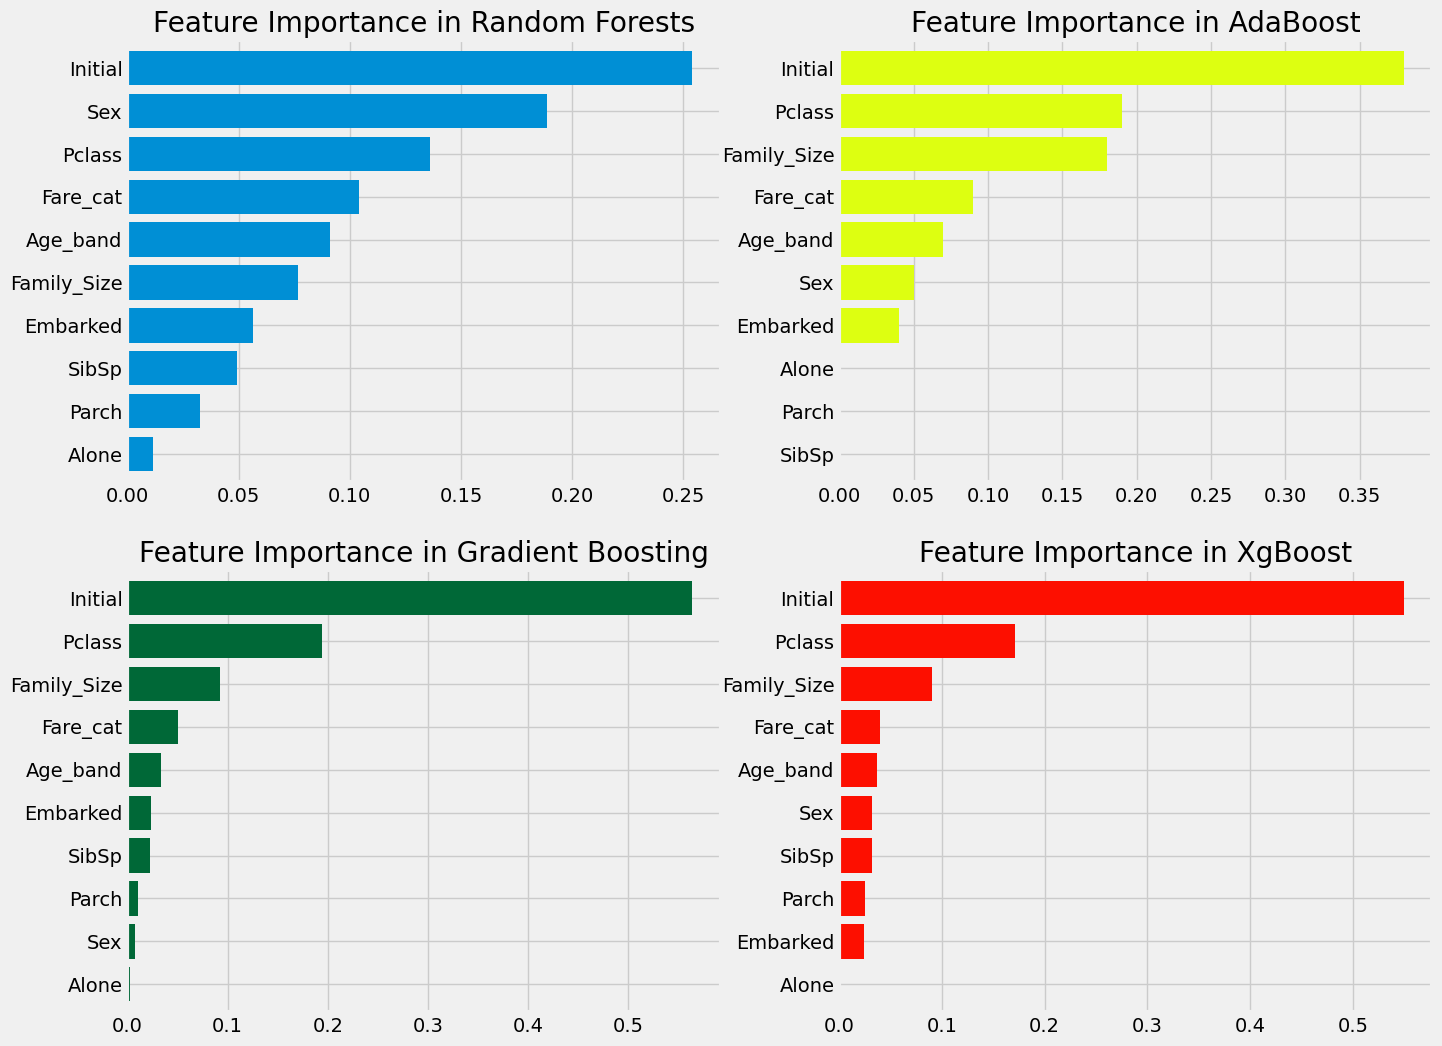

In [373]:
f, ax = plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

랜덤 포레스트, 에이다부스트 등 다양한 분류기의 중요한 기능을 확인할 수 있음.

1. 일반적으로 중요한 기능 중 일부는 초기, Fare_cat, Pclass, Family_size 임.
2. Sex 기능은 아무런 중요성을 부여하지 않는 것 같은데, 앞서 Sex와 Pclass가 결합된 것이 매우 좋은 차별화 요소라는 것을 보았기 때문에 충격적임. Sex는 랜덤 포레스트에서만 중요한 것으로 보임. 그러나, 많은 분류기에서 상위에 있는 Initial 기능을 볼 수 있음. 우리가 이미 성별과 Initial 사이의 양의 상관관계를 보았기 때문에 둘 다 성별을 가리킴.
3. 마찬가지로 Pclass와 Fare_cat는 승객의 상태와 Alone, Parch, SibSp를 사용하는 Family_size를 의미함.